<a href="https://colab.research.google.com/github/Andreaierardi/SocialNetworkAnalysis-project/blob/main/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Social Network Analysis Project**

> ## **University of Milan** - **DataScience and Economics**

<br>

#### Author : **Andrea Ierardi**

<br>


---




 <br>






## Dataset
### Description

Data collected about Facebook pages (November 2017). These datasets represent blue verified Facebook page networks of different categories. Nodes represent the pages and edges are mutual likes among them.








 <br>






In [485]:
import pandas as pd
nodes = pd.read_csv('https://raw.githubusercontent.com/Andreaierardi/SocialNetworkAnalysis-project/main/dataset/fb-pages-food.csv',sep=";")

edges = pd.read_csv('https://raw.githubusercontent.com/Andreaierardi/SocialNetworkAnalysis-project/main/dataset/fb-pages-food.edges')


In [486]:
print(nodes)
print(edges)

                        name   id
0                 Josh Marks  386
1    Blue Ribbon Restaurants  473
2                  Pat Neely    1
3                 La Griglia  542
4                Jose Garces  189
..                       ...  ...
615               Jumia Food  163
616              Luke Thomas  381
617          Clodagh McKenna  140
618  Chef Michelle Bernstein  157
619               SORTEDfood  114

[620 rows x 2 columns]
      source  target
0          0     276
1          0      58
2          0     132
3          0     603
4          0     398
...      ...     ...
2097     597     611
2098     601     603
2099     601     616
2100     603     616
2101     311     613

[2102 rows x 2 columns]


In [487]:
from collections import Counter # Counter counts the number of occurrences of each item
from itertools import tee, count
def uniquify(seq, suffs = count(1)):
    """Make all the items unique by adding a suffix (1, 2, etc).

    `seq` is mutable sequence of strings.
    `suffs` is an optional alternative suffix iterable.
    """
    not_unique = [k for k,v in Counter(seq).items() if v>1] # so we have: ['name', 'zip']
    # suffix generator dict - e.g., {'name': <my_gen>, 'zip': <my_gen>}
    suff_gens = dict(zip(not_unique, tee(suffs, len(not_unique))))  
    for idx,s in enumerate(seq):
        try:
            suffix = str(next(suff_gens[s]))
        except KeyError:
            # s was unique
            continue
        else:
            seq[idx] += suffix
    

In [488]:
names = list(nodes.name)
uniquify(names, (f'_{x!s}' for x in range(1, 100)))
names

['Josh Marks',
 'Blue Ribbon Restaurants',
 'Pat Neely',
 'La Griglia',
 'Jose Garces',
 'Zac Kara',
 'Big Fish Seafood Bistro_1',
 'Tom Aikens',
 'The Habit Burger Grill',
 'Chef Sheldon Simeon',
 'Ochikeron',
 'Taco Bell Cyprus',
 'Christophe Michalak',
 "Peohe's",
 'Destino Ibiza',
 'KFC_1',
 'Chef Shirley Chung',
 'Doug Adams',
 'משה שגב / Moshe Segev',
 'Angel Leon Gonzalez',
 'Ben Ebbrell - Sorted Chef',
 "Dick's Drive In Restaurant",
 'John Whaite',
 'Andy Luotto',
 'Antonino Cannavacciuolo',
 "Charley's Crab_1",
 'Anne-Sophie Pic',
 'Hilah Cooking',
 'Taco Bell Costa Rica',
 'Chef Robert Irvine',
 'Nutella Cafe Chicago',
 'Grand Concourse',
 "Domino's Pizza_1",
 'Chef Lorena Garcia',
 'James Martin',
 "Domino's Pizza_2",
 "Nando's_1",
 'Roy Yamaguchi',
 'Susan Feniger',
 "McDonald's_1",
 'Al Brown New Zealand Chef',
 'Veggie Grill',
 "Domino's Pizza_3",
 "McDonald's_2",
 'Franklin Becker',
 "McDonald's_3",
 'Éric Frechon',
 'KFC_2',
 'The Edgy Veg',
 "Domino's Pizza_4",
 'Zoёs 

In [532]:
# Find the name of the column by index
n = nodes.columns[0]

# Drop that column
nodes.drop(n, axis = 1, inplace = True)

# Put whatever series you want in its place
nodes[n] = names

list(nodes.name)[0:20]

['Josh Marks',
 'Blue Ribbon Restaurants',
 'Pat Neely',
 'La Griglia',
 'Jose Garces',
 'Zac Kara',
 'Big Fish Seafood Bistro_1',
 'Tom Aikens',
 'The Habit Burger Grill',
 'Chef Sheldon Simeon',
 'Ochikeron',
 'Taco Bell Cyprus',
 'Christophe Michalak',
 "Peohe's",
 'Destino Ibiza',
 'KFC_1',
 'Chef Shirley Chung',
 'Doug Adams',
 'משה שגב / Moshe Segev',
 'Angel Leon Gonzalez']

In [530]:
# Nodes as dictionary
nodes_dict = {}
for (n, id) in zip(nodes["name"],nodes["id"]):
 # print(n, "+", id)
  nodes_dict[id] = n

In [491]:
nodes_dict.values()

dict_values(['Josh Marks', 'Blue Ribbon Restaurants', 'Pat Neely', 'La Griglia', 'Jose Garces', 'Zac Kara', 'Big Fish Seafood Bistro_1', 'Tom Aikens', 'The Habit Burger Grill', 'Chef Sheldon Simeon', 'Ochikeron', 'Taco Bell Cyprus', 'Christophe Michalak', "Peohe's", 'Destino Ibiza', 'KFC_1', 'Chef Shirley Chung', 'Doug Adams', 'משה שגב / Moshe Segev', 'Angel Leon Gonzalez', 'Ben Ebbrell - Sorted Chef', "Dick's Drive In Restaurant", 'John Whaite', 'Andy Luotto', 'Antonino Cannavacciuolo', "Charley's Crab_1", 'Anne-Sophie Pic', 'Hilah Cooking', 'Taco Bell Costa Rica', 'Chef Robert Irvine', 'Nutella Cafe Chicago', 'Grand Concourse', "Domino's Pizza_1", 'Chef Lorena Garcia', 'James Martin', "Domino's Pizza_2", "Nando's_1", 'Roy Yamaguchi', 'Susan Feniger', "McDonald's_1", 'Al Brown New Zealand Chef', 'Veggie Grill', "Domino's Pizza_3", "McDonald's_2", 'Franklin Becker', "McDonald's_3", 'Éric Frechon', 'KFC_2', 'The Edgy Veg', "Domino's Pizza_4", 'Zoёs Kitchen', 'Chef Mark Garcia', "Dunkin'

\





## Network Building



In [492]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt

In [493]:
G = nx.Graph()

for e in edges.values.tolist():
  G.add_edge(e[0],e[1])

In [494]:
H = nx.relabel_nodes(G, nodes_dict)
len(sorted(H))

G = H

In [495]:
print('Number of nodes: {} - Number of links:{}'.format(G.order(),G.size()))


Number of nodes: 620 - Number of links:2102


\

# Degree Analysis

In [496]:
G.nodes()

NodeView(('Lee Anne Wong', 'KFC_3', 'Chef Jamie Gwen', 'Madison Cowan', 'Elizabeth Karmel', 'KFC_22', 'KFC_8', 'Pat Neely', 'Logan Junior Chef', 'Robin Miller', 'Ben Sargent & Dr. Klaw', 'Bobby Flay', 'Chuck Hughes', 'Chef Carlo Cracco', 'Pasqualino Barbasso', 'Alessandro Borghese', 'Chef Hirohiko Shoda', 'Alain Ducasse', 'Christian Bau', 'Andy Luotto', "Cristian D'Elia", 'Cuoco Filippo La Mantia', 'Mirko Ronzoni', 'Jock Zonfrillo', 'Chef Maeve Rochford', 'Wolfgang Puck', 'Scott Conant', 'Anne Burrell', 'Steve Konopelski', 'George Pagonis', 'Magnum_4', 'Mei Lin', 'Magnum_7', 'Magnum_1', 'Magnum_6', 'Jumia Food_7', 'Jumia Food_2', 'Jumia Food_10', 'Jumia Food_6', 'Jumia Food_8', "McDonald's_6", 'Roy Yamaguchi', 'Chef Sheldon Simeon', 'Outback Steakhouse', "Carrabba's Italian Grill", 'Chef Robert Irvine', "Roy's Restaurant", 'Bonefish Grill', "Chili's Grill & Bar", 'On The Border', 'Chef Mark Garcia', "Chili's México", 'foodpanda_5', "Chili's Qatar", 'José Andrés', 'Jacques Pépin', 'Tom 

In [497]:
density = nx.density(G)
print('Density: {}'.format(density))

Density: 0.0109541925061233


In [498]:
degree = list(dict(G.degree()).values())
degree[0:20]

[6, 11, 15, 2, 27, 9, 17, 2, 134, 47, 3, 31, 11, 10, 7, 10, 7, 19, 7, 3]

In [499]:
print('Standard deviation: {}'.format(np.std(degree)))
print('Mean: {}'.format(np.mean(degree)))
print('Median: {}'.format(np.median(degree)))
print('Min: {}'.format(np.min(degree)))
print('Max: {}'.format(np.max(degree)))


print("Assortativity coefficient: " + str(nx.degree_assortativity_coefficient(G)))

Standard deviation: 9.46914920573866
Mean: 6.780645161290322
Median: 4.0
Min: 1
Max: 134
Assortativity coefficient: -0.028203795222469928


\

### ECDF

Text(0, 0.5, 'ECDF Food')

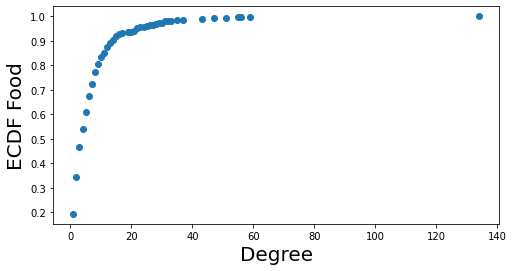

In [500]:
# ECDF linear scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.plot(x,y,marker='o',ms=6, linestyle='None')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF Food', size = 20)

Text(0, 0.5, 'ECDF Food')

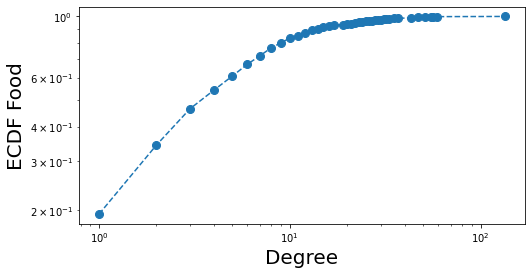

In [501]:

# ECDF loglog scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF Food', size = 20)


Text(0, 0.5, 'ECCDF FOOD')

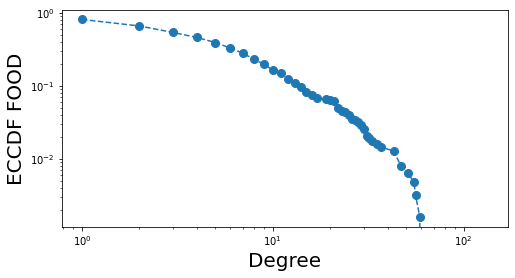

In [502]:
# ECCDF
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF FOOD', size = 20)

In [503]:
p = density
random_graph = nx.fast_gnp_random_graph(G.order(),p)


In [504]:
print('Number of nodes: {}'.format(random_graph.order()))
print('Number of links: {}'.format(random_graph.size()))

Number of nodes: 620
Number of links: 2147


In [505]:
random_degree = list(dict(random_graph.degree()).values())
print('Random Net Standard deviation: {}'.format(np.std(random_degree)))
print('Random Net Mean: {}'.format(np.mean(random_degree)))
print('Random Net Median: {}'.format(np.median(random_degree)))
print('Random Net Min: {}'.format(np.min(random_degree)))
print('Random Net Max: {}'.format(np.max(random_degree)))

Random Net Standard deviation: 2.5780046975526516
Random Net Mean: 6.925806451612903
Random Net Median: 7.0
Random Net Min: 1
Random Net Max: 16


Text(0, 0.5, 'ECCDF')

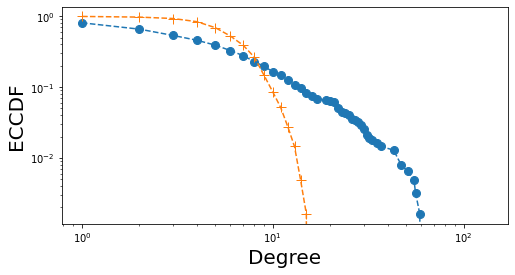

In [506]:
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf_fb = plt.figure(figsize=(8,4))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.loglog(x_random,1-y_random,marker='+',ms=10, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)

\

## HUBS

In [507]:
percentile_99 = np.percentile(degree,99)
print(percentile_99)

47.0


In [508]:
hub_nodi = [k for k,v in dict(G.degree()).items() if v>= percentile_99]


In [509]:
print(len(hub_nodi))
print(list(hub_nodi))

8
['Logan Junior Chef', 'Robin Miller', 'Scott Conant', "McDonald's_6", 'Eric Ripert', 'Alex Guarnaschelli', 'David Chang', 'Chef Daniel Boulud']


In [510]:
print(list(nx.isolates(G)))


[]


\

## Connectivity

In [511]:
print(nx.is_connected(G))
print(nx.number_connected_components(G))

True
1


In [512]:
import math

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12505 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12515 missing from current font.
  font.set_

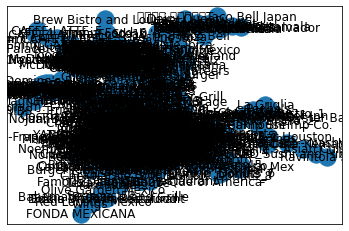

In [513]:
nx.draw_networkx(H,with_labels=True)


In [514]:
nx.number_connected_components(G)

1

In [515]:
#dir(G)

In [516]:
nodes

,id,name
0,386,Josh Marks
1,473,Blue Ribbon Restaurants
2,1,Pat Neely
3,542,La Griglia
4,189,Jose Garces
...,...,...
615,163,Jumia Food_10
616,381,Luke Thomas
617,140,Clodagh McKenna
618,157,Chef Michelle Bernstein


In [517]:
len(nx.triangles(H))

620

\

\

## Clusters

In [518]:
clusters = nx.average_clustering(G)
clusters

0.3308970263553271

In [519]:
type(clusters)

float

In [520]:
nx.transitivity(G)


0.22264084150905228

In [521]:
local_cluster = nx.clustering(G)
sorted(local_cluster.items(), key=lambda item: item[1], reverse= True)


[('Pat Neely', 1.0),
 ('Ben Sargent & Dr. Klaw', 1.0),
 ('Jumia Food_6', 1.0),
 ("Chili's México", 1.0),
 ('Taco Bell El Salvador', 1.0),
 ('KFC_17', 1.0),
 ("Domino's Pizza_11", 1.0),
 ('Delverde_1', 1.0),
 ('Delverde_3', 1.0),
 ("Nando's_12", 1.0),
 ("Nando's_8", 1.0),
 ("McDonald's Deutschland Karriere", 1.0),
 ("McDonald's_37", 1.0),
 ("McDonald's_8", 1.0),
 ("McDonald's_11", 1.0),
 ('Valentin Neraudeau', 1.0),
 ('Chef Aaron McCargo Jr', 1.0),
 ('Al Brown New Zealand Chef', 1.0),
 ('Princi', 1.0),
 ('ad hoc & addendum', 1.0),
 ('Katie Pix', 1.0),
 ('KFC_24', 1.0),
 ('Douglas Keane', 1.0),
 ("McDonald's_57", 1.0),
 ("McDonald's_50", 1.0),
 ('Taco Bell Kuwait', 1.0),
 ('タコベル ジャパン\u3000Taco Bell Japan', 1.0),
 ('Taco Bell India', 1.0),
 ('Maru Botana', 1.0),
 ('Crepes & Waffles', 1.0),
 ('João Alcantara', 1.0),
 ("McDonald's Paraguay", 1.0),
 ("McDonald's_34", 1.0),
 ('Buddy Valastro', 1.0),
 ('Dale Talde', 1.0),
 ('Emmi CAFFÈ LATTE_3', 1.0),
 ("Nando's_10", 1.0),
 ("Nando's_7", 1.0),

In [522]:
triangle = nx.triangles(G)
triangle

{"'Wichcraft": 0,
 'Aarón Sánchez': 89,
 'Acapulco': 1,
 'Al Brown New Zealand Chef': 1,
 'Alain Ducasse': 28,
 'Alberto Chicote': 0,
 'Alessandro Borghese': 15,
 'Alex Atala': 11,
 'Alex French Guy Cooking': 3,
 'Alex Guarnaschelli': 271,
 'Alfred Portale': 10,
 'Aliya LeeKong': 0,
 'Amandine Chaignot': 2,
 'Amy Thielen': 8,
 'Andy Luotto': 2,
 'Angel Leon Gonzalez': 0,
 'Angelo Sosa': 0,
 'Anis Nabilah': 0,
 'Anjali Pathak': 0,
 'Anne Burrell': 74,
 'Anne-Sophie Pic': 28,
 'Antonino Cannavacciuolo': 10,
 'Aquarium Restaurant - Nashville': 0,
 'Audra Morrice': 2,
 'Bahama Breeze Island Grille': 0,
 'Barbie Marshall': 1,
 'Ben Ebbrell - Sorted Chef': 0,
 'Ben Sargent & Dr. Klaw': 3,
 'Big Fernand': 0,
 'Big Fish Seafood Bistro_1': 29,
 'Big Fish Seafood Bistro_2': 21,
 'Blue Ribbon Fried Chicken': 2,
 'Blue Ribbon Restaurants': 8,
 'Bobby Flay': 94,
 "Bobby's Burger Palace": 1,
 'Bonefish Grill': 4,
 'Boston Market': 0,
 'Bradley Ogden': 7,
 'Brew Bistro and Lounge': 0,
 'Brooke Willia

\

## Centrality



In [529]:
deg_centr = nx.degree_centrality(G)


In [524]:
eigen = nx.eigenvector_centrality(G)
#eigen

In [525]:
pagerank = nx.pagerank(G)
#pagerank

In [526]:
betweenesCentrality = nx.betweenness_centrality(G)
#betweenesCentrality

\

## Communities


In [527]:
from networkx.algorithms import community

greedy = community.greedy_modularity_communities(G)

In [528]:
c = list(greedy)
for i in range(0, len(c)):
    print(len(c[i]))

164
72
53
46
37
36
33
31
31
30
17
17
13
6
6
6
5
5
5
3
2
2
